In [8]:
import glob
import netCDF4
import xarray 
import numpy as np
import datetime as dt
import pandas as pd
from pandas import DataFrame

import os
import csv
import numpy as np                  # For doing math
import matplotlib.pyplot as plt     # For plotting
import matplotlib.dates as mdates   # For formatting dates when plotting
import matplotlib.colors as colors  # For truncating colorbars
import matplotlib.style as style
import xarray as xr                 # For dealing with netCDF data
import pandas as pd                 # A quick way to deal with time stamps

## Open data

In [2]:
df=pd.read_csv('V_superdarn_hrly_winds.csv')
df_w=pd.read_csv('V_waccmxdart_hrly_winds.csv')

## Read-in Superdarn data

In [3]:
df = df.replace(-999.0, np.nan)

# get rid of ugly column name (so we can use datetime)
df.rename(columns = {'# year':'year'}, inplace = True) 

# Create datetime array and insert it into the dataframe
date = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
date = pd.to_datetime(date)
df.insert(0, 'Date', date)

#Get rid of the columns we don't need anymore
df = df.drop(columns=['year', 'month', 'day', 'hour'])

print("Ending dataframe:")
print(df)

Ending dataframe:
                    Date   Kod   Pgr   Sas   Rkn   Pyk   Han
0    2009-01-10 00:00:00  14.0   NaN  -5.0   4.0   3.0  -7.0
1    2009-01-10 01:00:00  27.0   NaN  13.0   7.0  -7.0  -7.0
2    2009-01-10 02:00:00   6.0   NaN  41.0  17.0   6.0 -18.0
3    2009-01-10 03:00:00   6.0   NaN  39.0 -26.0  -1.0  -6.0
4    2009-01-10 04:00:00  17.0   NaN  32.0 -44.0  -1.0  -0.0
...                  ...   ...   ...   ...   ...   ...   ...
1651 2009-03-19 19:00:00  10.0  -7.0  -0.0   NaN -14.0  -0.0
1652 2009-03-19 20:00:00   8.0  -4.0  -4.0  15.0   5.0  -6.0
1653 2009-03-19 21:00:00  15.0   2.0  22.0  31.0  -1.0 -10.0
1654 2009-03-19 22:00:00   NaN  15.0   3.0   NaN  -6.0 -19.0
1655 2009-03-19 23:00:00   NaN  11.0  -5.0  15.0   3.0 -16.0

[1656 rows x 7 columns]


## Read-in WACCMXDART data

In [4]:
df_w = df_w.replace(-999.0, np.nan)

# get rid of ugly column name (so we can use datetime)
df_w.rename(columns = {'# year':'year'}, inplace = True) 

# Create datetime array and insert it into the dataframe
date = pd.to_datetime(df_w[['year', 'month', 'day', 'hour']])
date = pd.to_datetime(date)
df_w.insert(0, 'Date', date)

#Get rid of the columns we don't need anymore
df_w = df_w.drop(columns=['year', 'month', 'day', 'hour'])

print("Ending dataframe:")
print(df_w)

Ending dataframe:
                    Date    Kod    Pgr    Sas    Rkn    Pyk    Han
0    2009-01-10 00:00:00  27.54  -9.25 -42.43  14.56   8.56 -51.36
1    2009-01-10 01:00:00  18.78 -22.15 -54.37  24.59  -6.43 -67.18
2    2009-01-10 02:00:00   3.65 -28.72 -47.28  25.42 -12.99 -46.87
3    2009-01-10 03:00:00 -15.19 -31.23 -37.46  36.71  -9.13 -34.93
4    2009-01-10 04:00:00  -7.01 -10.71 -21.00  18.16  -1.23 -37.62
...                  ...    ...    ...    ...    ...    ...    ...
1651 2009-03-19 19:00:00   5.39   4.29 -14.82  -5.80  30.10 -46.06
1652 2009-03-19 20:00:00   1.20  19.18  -0.15 -15.69  20.11 -40.45
1653 2009-03-19 21:00:00  -3.97  30.09  10.72 -15.39   9.32 -39.07
1654 2009-03-19 22:00:00  10.22  10.33   1.57  -5.43   3.02 -26.62
1655 2009-03-19 23:00:00  40.52  -4.90  -1.31  -4.94   8.71 -26.09

[1656 rows x 7 columns]


## Set Date as index for both datasets

In [5]:
df=df.set_index('Date')
df_w=df_w.set_index('Date')

## Graphs for the 6 radar stations

<ipython-input-12-467f507370ac>:59: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.axvline(pd.datetime(2009,1,28))


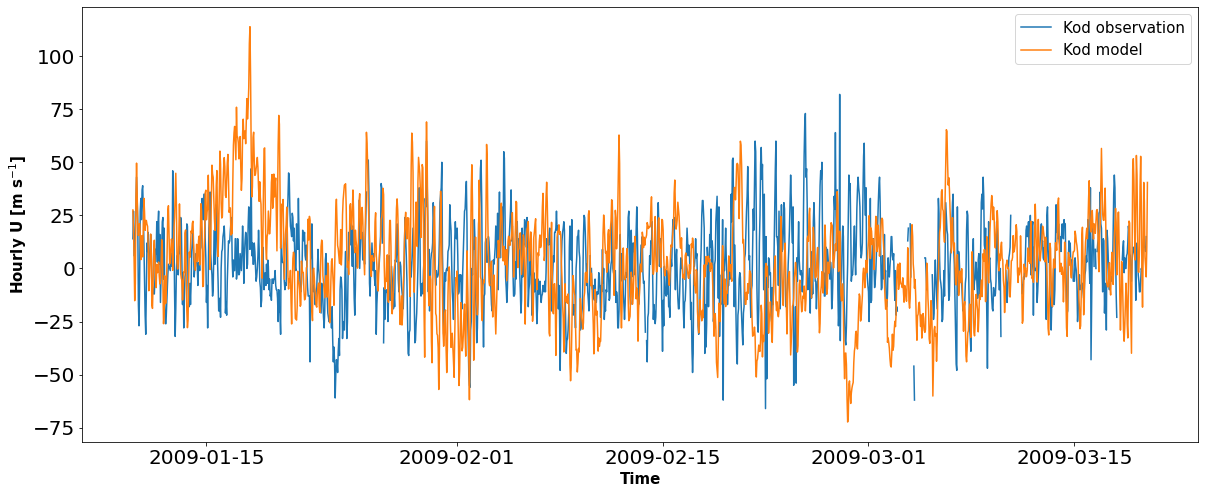

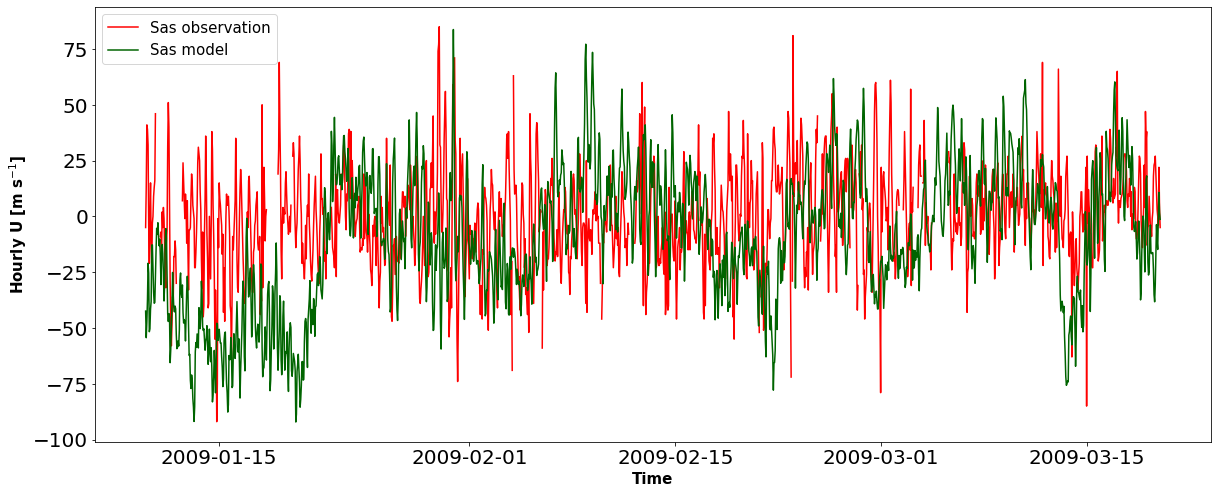

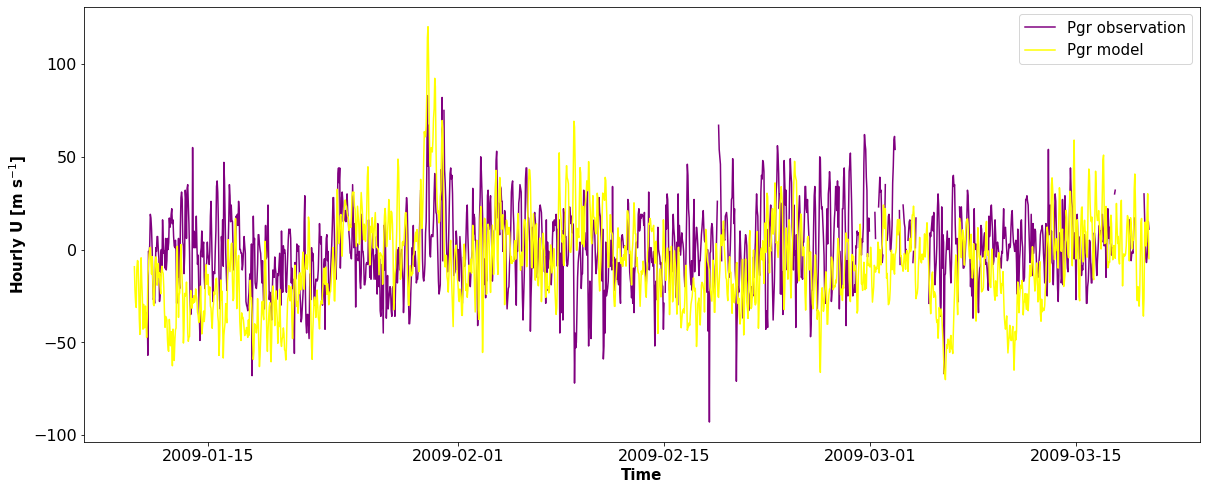

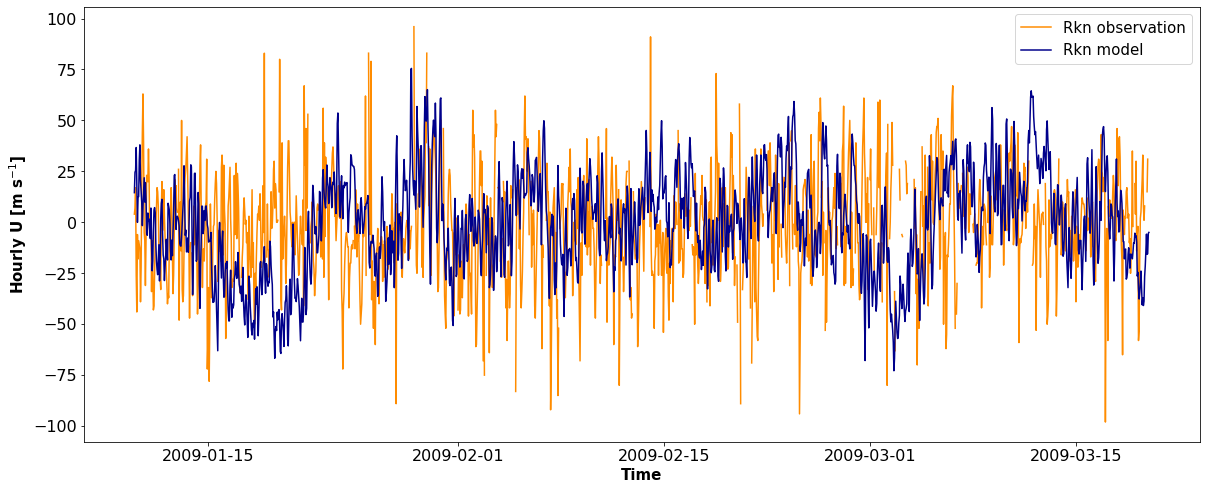

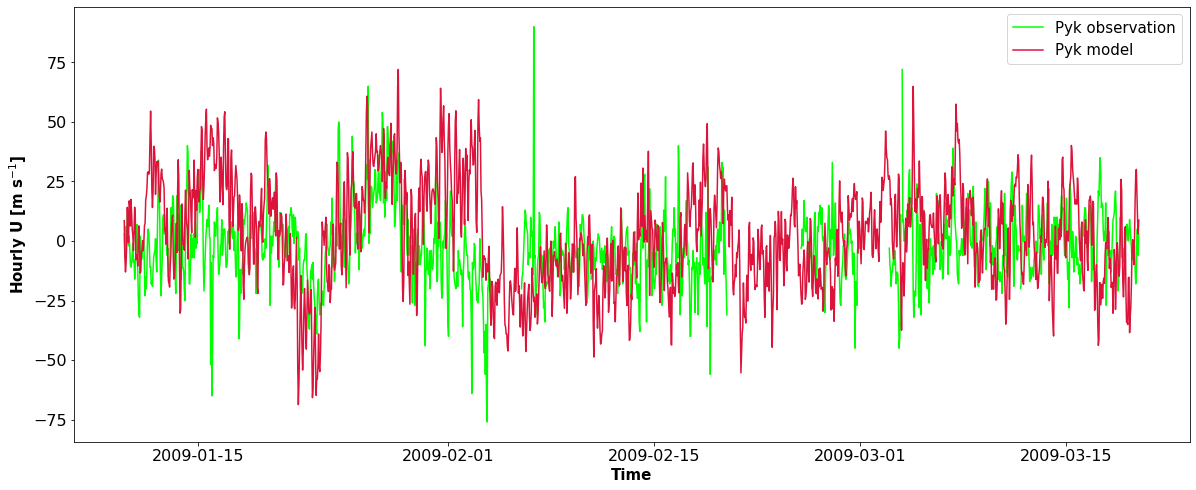

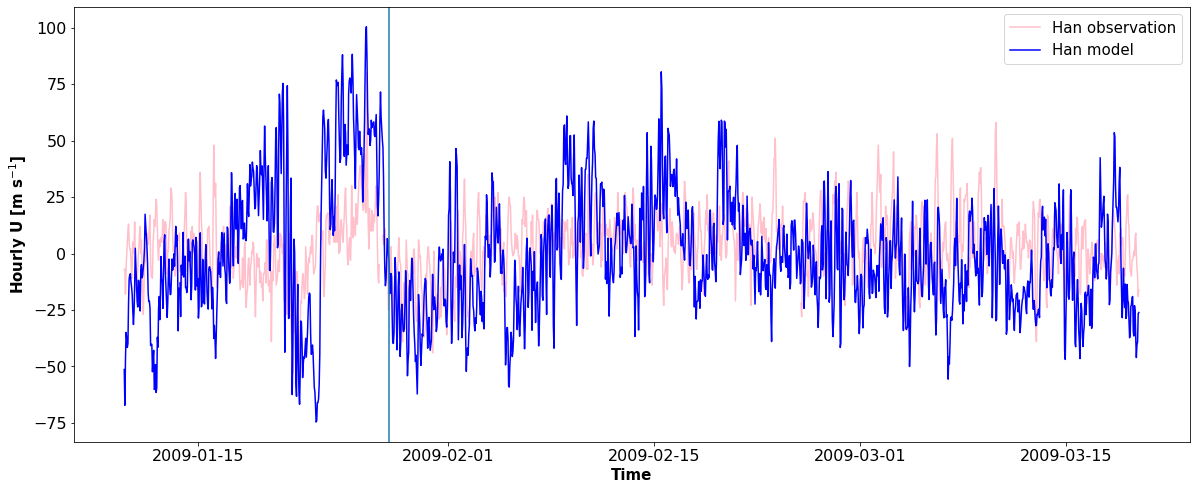

In [12]:
#Kod radar station 
plt.figure(figsize=(20,8))
plt.plot(df.index,df['Kod'], label='Kod observation')
plt.plot(df_w.index,df_w['Kod'], label= 'Kod model')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Time',fontsize=15,fontweight='bold')
plt.ylabel('Hourly U [m s$^{-1}$]', fontsize=15,fontweight='bold')
plt.legend(fontsize=15)

#Sas radar station 
plt.figure(figsize=(20,8))
plt.plot(df.index,df['Sas'], label='Sas observation', color='r')
plt.plot(df_w.index,df_w['Sas'], label= 'Sas model', color='darkgreen')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Time',fontsize=15,fontweight='bold')
plt.ylabel('Hourly U [m s$^{-1}$]', fontsize=15,fontweight='bold')
plt.legend(fontsize=15)

#Pgr radar station
plt.figure(figsize=(20,8))
plt.plot(df.index,df['Pgr'], label='Pgr observation', color = 'purple')
plt.plot(df_w.index,df_w['Pgr'], label= 'Pgr model', color = 'yellow')
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel('Time',fontsize=15,fontweight='bold')
plt.ylabel('Hourly U [m s$^{-1}$]', fontsize=15,fontweight='bold')
plt.legend(fontsize=15)

#Rkn radar station
plt.figure(figsize=(20,8))
plt.plot(df.index,df['Rkn'], label='Rkn observation', color = 'darkorange')
plt.plot(df_w.index,df_w['Rkn'], label= 'Rkn model', color = 'darkblue')
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel('Time',fontsize=15,fontweight='bold')
plt.ylabel('Hourly U [m s$^{-1}$]', fontsize=15,fontweight='bold')
plt.legend(fontsize=15)

#Pyk radar station
plt.figure(figsize=(20,8))
plt.plot(df.index,df['Pyk'], label='Pyk observation', color = 'lime')
plt.plot(df_w.index,df_w['Pyk'], label= 'Pyk model', color = 'crimson')
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel('Time',fontsize=15,fontweight='bold')
plt.ylabel('Hourly U [m s$^{-1}$]', fontsize=15,fontweight='bold')
plt.legend(fontsize=15)

#Han radar station
plt.figure(figsize=(20,8))
plt.plot(df.index,df['Han'], label='Han observation', color = 'pink')
plt.plot(df_w.index,df_w['Han'], label= 'Han model', color = 'blue')
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel('Time',fontsize=15,fontweight='bold')
plt.ylabel('Hourly U [m s$^{-1}$]', fontsize=15,fontweight='bold')
plt.axvline(pd.datetime(2009,1,28))
plt.legend(fontsize=15)

In [13]:
x=df.iloc[(df.index>='2009-01-28')]
x1=df_w.iloc[(df_w.index>='2009-01-28')]

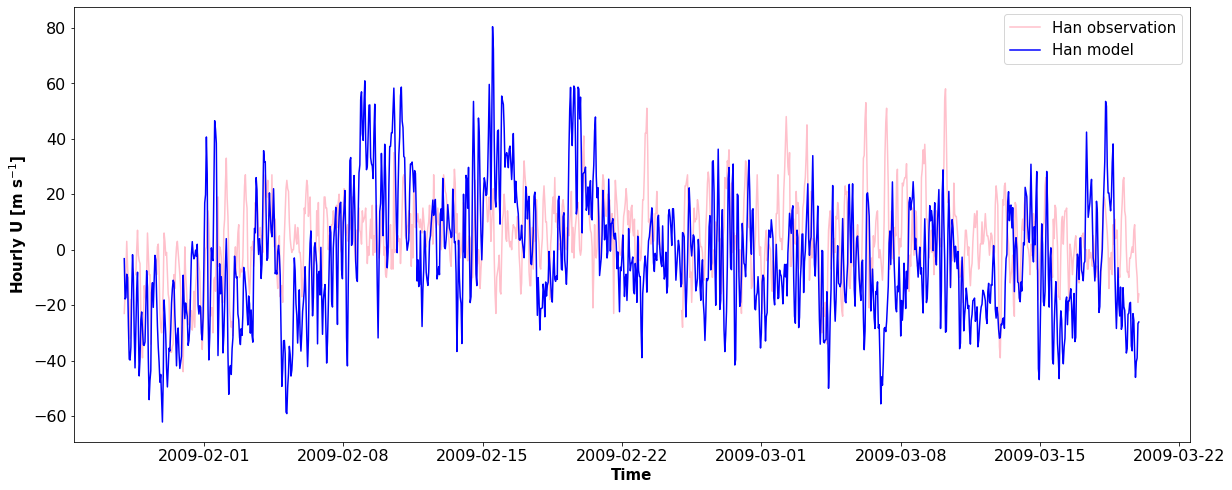

In [15]:
plt.figure(figsize=(20,8))
plt.plot(x.index,x['Han'], label='Han observation', color = 'pink')
plt.plot(x1.index,x1['Han'], label= 'Han model', color = 'blue')
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel('Time',fontsize=15,fontweight='bold')
plt.ylabel('Hourly U [m s$^{-1}$]', fontsize=15,fontweight='bold')
plt.legend(fontsize=15)

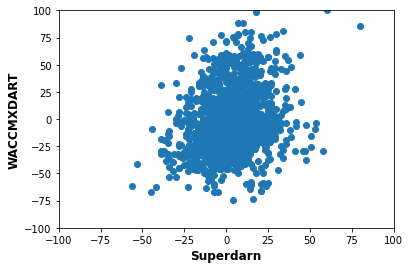

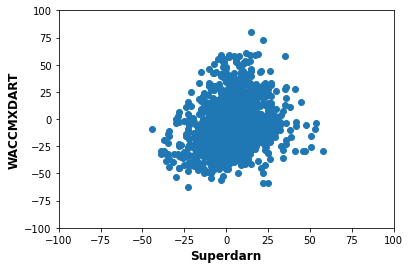

In [16]:
plt.scatter(df['Han'],df_w['Han'])
plt.xlabel('Superdarn',fontsize=12,fontweight='bold')
plt.ylabel('WACCMXDART',fontsize=12,fontweight='bold')
plt.ylim(-100,100)
plt.xlim(-100,100)
plt.show()

plt.scatter(x['Han'],x1['Han'])
plt.xlabel('Superdarn',fontsize=12,fontweight='bold')
plt.ylabel('WACCMXDART',fontsize=12,fontweight='bold')
plt.ylim(-100,100)
plt.xlim(-100,100)
plt.show()